In [1]:
%run "../LOS.ipynb"

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
df = dreams_mastersheet

# Base Cohorte

In [4]:
base_cohort = df[
    (df.age_range!="not_valid_age")
    &(df.age_range!="25-29")
    &(df.timeOn_system=="required_Time_on")
]
base_cohort.code.count()

18385

# Number of Curriculum completion Per Last session taken

In [5]:
curriculum_complet = base_cohort[
    (base_cohort.dreams_curriculum=="curriculum_completed")
]
curriculum_complet.code.count()

15258

In [6]:
curriculum_complet.pivot_table(index="actual_departement",columns="curriculum_date_end_fy",
                        values='code',
                        aggfunc='count',
                        fill_value=0,
                        margins=True,
                        margins_name="Grand Total"                             
)

curriculum_date_end_fy,FY20Q2,FY20Q3,FY20Q4,FY21Q1,FY21Q2,FY21Q3,FY21Q4,errata,Grand Total
actual_departement,,,,,,,,,
Artibonite,0,421,4901,40,1,1046,574,1,6984
Nord,0,2,992,1,0,473,75,0,1543
Ouest,2,335,3277,113,139,1568,1297,0,6731
Grand Total,2,758,9170,154,140,3087,1946,1,15258


In [7]:
curriculum_complet.pivot_table(index=["actual_departement",'actual_commune'],columns="curriculum_date_end_fy",
                        values='code',
                        aggfunc='count',
                        fill_value=0,
                        margins=True,
                        margins_name="Grand Total"                             
)

curriculum_date_end_fy                             FY20Q2  FY20Q3  FY20Q4  \
actual_departement actual_commune                                           
Artibonite         Desdunes                             0      20     457   
                   Dessalines                           0      92     689   
                   Grande Saline                        0      90     843   
                   La Chapelle                          0      38     234   
                   Liancourt                            0      13     130   
                   Montrouis                            0       7     271   
                   Petite Rivière de l'Artibonite       0      32     378   
                   Saint-Marc                           0      66     585   
                   Verrettes                            0      63    1314   
Nord               Cap-Haïtien                          0       1     490   
                   Limonade                             0       0     233   
                   Milot                                0       0     126   
                   Plaine-du-Nord                       0       1     103   
                   Quartier-Morin                       0       0      40   
Ouest              Carrefour                            0     103     798   
                   Delmas                               0      56     250   
                   Gressier                             0      26     262   
                   Kenscoff                             0     100    1164   
                   Port-au-Prince                       2       4     424   
                   Pétionville                          0      18     179   
                   Tabarre                              0      28     200   
Grand Total                                             2     758    9170   

curriculum_date_end_fy                             FY21Q1  FY21Q2  FY21Q3  \
actual_departement actual_commune                                           
Artibonite         Desdunes                             0       0      52   
                   Dessalines                           1       0     200   
                   Grande Saline                        0       0      41   
                   La Chapelle                         27       0     113   
                   Liancourt                            0       0      54   
                   Montrouis                           12       0      24   
                   Petite Rivière de l'Artibonite       0       0     120   
                   Saint-Marc                           0       0     255   
                   Verrettes                            0       1     187   
Nord               Cap-Haïtien                          0       0     139   
                   Limonade                             0       0     172   
                   Milot                                0       0     109   
                   Plaine-du-Nord                       1       0      46   
                   Quartier-Morin                       0       0       7   
Ouest              Carrefour                           73       0     242   
                   Delmas                               4       0     145   
                   Gressier                             9       0     350   
                   Kenscoff                             0     138     561   
                   Port-au-Prince                      14       0     109   
                   Pétionville                          0       1      80   
                   Tabarre                             13       0      81   
Grand Total                                           154     140    3087   

curriculum_date_end_fy                             FY21Q4  errata  Grand Total  
actual_departement actual_commune                                               
Artibonite         Desdunes                            55       0          584  
                   Dessalines                         115  

In [8]:

curriculum_complet_pres = curriculum_complet[
    (curriculum_complet.curriculum_date_end_fy!="FY20Q2")
    &(curriculum_complet.curriculum_date_end_fy!="errata")
]

In [9]:
curriculum_dept = curriculum_complet_pres.pivot_table(index="actual_departement",columns="curriculum_date_end_fy",
                        values='code',
                        aggfunc='count',
                        fill_value=0,
                        margins=True,
                        margins_name="Grand Total"                             
)
curriculum_dept

curriculum_date_end_fy,FY20Q3,FY20Q4,FY21Q1,FY21Q2,FY21Q3,FY21Q4,Grand Total
actual_departement,,,,,,,
Artibonite,421,4901,40,1,1046,574,6983
Nord,2,992,1,0,473,75,1543
Ouest,335,3277,113,139,1568,1297,6729
Grand Total,758,9170,154,140,3087,1946,15255


In [10]:
curriculum_commune_dept = curriculum_complet_pres.pivot_table(index=["actual_departement",'actual_commune'],columns="curriculum_date_end_fy",
                        values='code',
                        aggfunc='count',
                        fill_value=0,
                        margins=True,
                        margins_name="Grand Total"                             
)

curriculum_commune_dept

curriculum_date_end_fy                             FY20Q3  FY20Q4  FY21Q1  \
actual_departement actual_commune                                           
Artibonite         Desdunes                            20     457       0   
                   Dessalines                          92     689       1   
                   Grande Saline                       90     843       0   
                   La Chapelle                         38     234      27   
                   Liancourt                           13     130       0   
                   Montrouis                            7     271      12   
                   Petite Rivière de l'Artibonite      32     378       0   
                   Saint-Marc                          66     585       0   
                   Verrettes                           63    1314       0   
Nord               Cap-Haïtien                          1     490       0   
                   Limonade                             0     233       0   
                   Milot                                0     126       0   
                   Plaine-du-Nord                       1     103       1   
                   Quartier-Morin                       0      40       0   
Ouest              Carrefour                          103     798      73   
                   Delmas                              56     250       4   
                   Gressier                            26     262       9   
                   Kenscoff                           100    1164       0   
                   Port-au-Prince                       4     424      14   
                   Pétionville                         18     179       0   
                   Tabarre                             28     200      13   
Grand Total                                           758    9170     154   

curriculum_date_end_fy                             FY21Q2  FY21Q3  FY21Q4  \
actual_departement actual_commune                                           
Artibonite         Desdunes                             0      52      55   
                   Dessalines                           0     200     115   
                   Grande Saline                        0      41      89   
                   La Chapelle                          0     113     101   
                   Liancourt                            0      54      12   
                   Montrouis                            0      24      45   
                   Petite Rivière de l'Artibonite       0     120      18   
                   Saint-Marc                           0     255      96   
                   Verrettes                            1     187      43   
Nord               Cap-Haïtien                          0     139       3   
                   Limonade                             0     172      15   
                   Milot                                0     109       0   
                   Plaine-du-Nord                       0      46      57   
                   Quartier-Morin                       0       7       0   
Ouest              Carrefour                            0     242     305   
                   Delmas                               0     145      40   
                   Gressier                             0     350      28   
                   Kenscoff                           138     561     756   
                   Port-au-Prince                       0     109      52   
                   Pétionville                          1      80      29   
                   Tabarre                              0      81      87   
Grand Total                                           140    3087    1946   

curriculum_date_end_fy                             Grand Total  
actual_departement actual_commune                               
Artibonite         Desdunes                                584  
                   Dessalines                             1097  
                   Grande Saline          

In [11]:
all_curriculum_trim = pd.ExcelWriter(f"curriculum_trim.xlsx",engine="xlsxwriter")
curriculum_dept.to_excel(all_curriculum_trim,sheet_name="depart",index=True,na_rep="NULL")
curriculum_commune_dept.to_excel(all_curriculum_trim,sheet_name="commune_depart",index=True,na_rep="NULL")
all_curriculum_trim.save()

In [34]:

Q3Q4FY20_curriculum = curriculum_complet[
    (curriculum_complet.curriculum_date_end_fy=="FY20Q3")
].code.count() + curriculum_complet[
    (curriculum_complet.curriculum_date_end_fy=="FY20Q4")
].code.count() 

curriculum_schema = pd.DataFrame({
    "state":["Q3FY20-Q4FY20",
                "FY21Q1",
                "FY21Q2",
                "FY21Q3",
                "FY21Q4",
            ],
    "data": [
        Q3Q4FY20_curriculum,
        curriculum_complet[
    (curriculum_complet.curriculum_date_end_fy=="FY21Q1")
].code.count(),
        curriculum_complet[
    (curriculum_complet.curriculum_date_end_fy=="FY21Q2")
].code.count(),
        curriculum_complet[
    (curriculum_complet.curriculum_date_end_fy=="FY21Q3")
].code.count(),
        curriculum_complet[
    (curriculum_complet.curriculum_date_end_fy=="FY21Q4")
].code.count()
    ]    
})
curriculum_schema

,state,data
0,Q3FY20-Q4FY20,9928
1,FY21Q1,154
2,FY21Q2,140
3,FY21Q3,3087
4,FY21Q4,1946


<Figure size 1152x576 with 0 Axes>

Text(0.5, 0, '')

Text(0, 0.5, '')

Text(0.5, 0.98, 'AGYW and their completion period of the curriculum')

Text(9930.0, 0.0, '9928')

Text(156.0, 1.0, '154')

Text(142.0, 2.0, '140')

Text(3089.0, 3.0, '3087')

Text(1948.0, 4.0, '1946')

Text(-80, -20, 'source: HIVHaiti')

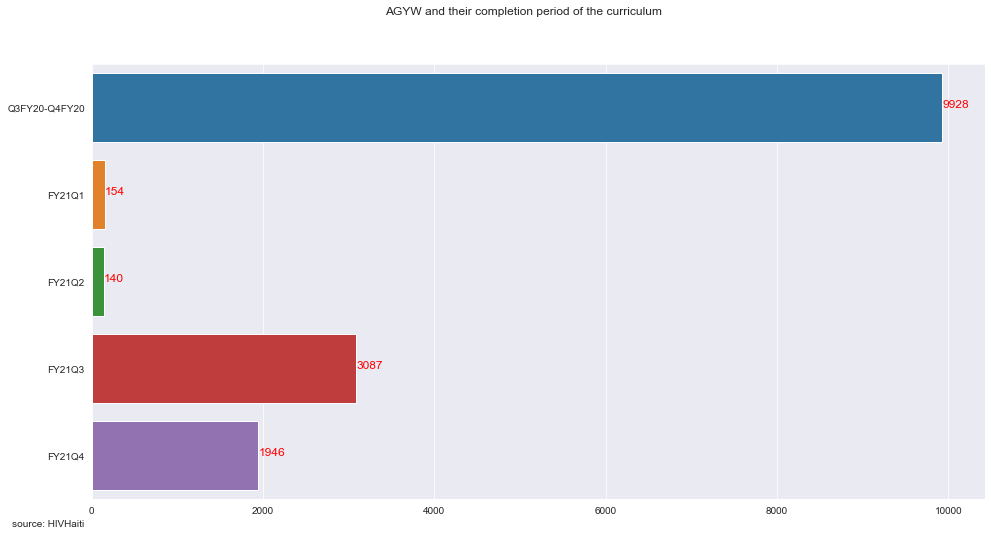

In [14]:
plt.figure(figsize=(16,8))
sns.set_style("darkgrid")
splot = sns.barplot(x="data",y="state",data=curriculum_schema)
splot.set_xlabel("")
splot.set_ylabel("")
plt.suptitle("AGYW and their completion period of the curriculum")
for p in splot.patches:
    width = p.get_width()
    plt.text(2+p.get_width(), p.get_y()+0.50*p.get_height(),
             '{:1.0f}'.format(width), fontdict=dict(color="red",fontsize=12))
    
plt.annotate(
    "source: HIVHaiti",(0,0), (-80,-20), fontsize=10, 
             xycoords='axes fraction', textcoords='offset points', va='top'
)

plt.savefig("Curriculum_complete_trim",dpi=400)

# Number of condoms received per quarter 

In [17]:
condoms_tested = base_cohort[
    (base_cohort.condoms=="tested_on_given_date")
]
condoms_tested.code.count()

condoms_sens = base_cohort[
    (base_cohort.new_condoms=="sensOuRecu")
    &(base_cohort.condoms=="errata")
]
condoms_sens.code.count()

condoms_tested_sens = base_cohort[
    (base_cohort.new_condoms=="sensOuRecu")
]
condoms_tested_sens.code.count()



3087

202

3289

In [26]:
condoms_tested_sens.pivot_table(index="actual_departement",columns="condoms_fy",
                        values='code',
                        aggfunc='count',
                        fill_value=0,
                        margins=True,
                        margins_name="Grand Total"                             
)

condoms_fy,FY20Q2,FY20Q3,FY20Q4,FY21Q1,FY21Q2,FY21Q3,FY21Q4,errata,Grand Total
actual_departement,,,,,,,,,
Artibonite,1,77,793,4,9,405,187,170,1646
Nord,0,1,83,0,0,8,11,3,106
Ouest,0,74,613,2,62,327,430,29,1537
Grand Total,1,152,1489,6,71,740,628,202,3289


In [27]:
condoms_qarter = condoms_tested_sens[
    (condoms_tested_sens.condoms_fy!="FY20Q2")
]

In [31]:
condoms_dept = condoms_qarter.pivot_table(index="actual_departement",columns="condoms_fy",
                        values='code',
                        aggfunc='count',
                        fill_value=0,
                        margins=True,
                        margins_name="Grand Total"                             
)
condoms_dept.rename(columns={"errata":"sensibilise"},inplace=True)
condoms_dept

condoms_fy,FY20Q3,FY20Q4,FY21Q1,FY21Q2,FY21Q3,FY21Q4,sensibilise,Grand Total
actual_departement,,,,,,,,
Artibonite,77,793,4,9,405,187,170,1645
Nord,1,83,0,0,8,11,3,106
Ouest,74,613,2,62,327,430,29,1537
Grand Total,152,1489,6,71,740,628,202,3288


In [32]:
condoms_dept_commune = condoms_qarter.pivot_table(index=["actual_departement","actual_commune"],columns="condoms_fy",
                        values='code',
                        aggfunc='count',
                        fill_value=0,
                        margins=True,
                        margins_name="Grand Total"                             
)
condoms_dept_commune.rename(columns={"errata":"sensibilise"},inplace=True)
condoms_dept_commune

condoms_fy                                         FY20Q3  FY20Q4  FY21Q1  \
actual_departement actual_commune                                           
Artibonite         Desdunes                             0      90       0   
                   Dessalines                          29     122       0   
                   Grande Saline                        5      52       2   
                   La Chapelle                          1       2       0   
                   Liancourt                            0      70       0   
                   Montrouis                            0      41       0   
                   Petite Rivière de l'Artibonite       4     134       0   
                   Saint-Marc                          11     156       2   
                   Verrettes                           27     126       0   
Nord               Cap-Haïtien                          1      17       0   
                   Limonade                             0      42       0   
                   Milot                                0      19       0   
                   Plaine-du-Nord                       0       5       0   
                   Quartier-Morin                       0       0       0   
Ouest              Carrefour                            1     103       0   
                   Delmas                              11      41       0   
                   Gressier                             0      86       0   
                   Kenscoff                            59     288       1   
                   Port-au-Prince                       0      30       0   
                   Pétionville                          0      14       0   
                   Tabarre                              3      51       1   
Grand Total                                           152    1489       6   

condoms_fy                                         FY21Q2  FY21Q3  FY21Q4  \
actual_departement actual_commune                                           
Artibonite         Desdunes                             0      46      14   
                   Dessalines                           0      13       1   
                   Grande Saline                        0      10      57   
                   La Chapelle                          0       0      18   
                   Liancourt                            0      34      31   
                   Montrouis                            0       0       0   
                   Petite Rivière de l'Artibonite       0      41       0   
                   Saint-Marc                           0      88      57   
                   Verrettes                            9     173       9   
Nord               Cap-Haïtien                          0       0       2   
                   Limonade                             0       2       8   
                   Milot                                0       6       0   
                   Plaine-du-Nord                       0       0       1   
                   Quartier-Morin                       0       0       0   
Ouest              Carrefour                            0      43      11   
                   Delmas                               0       5       0   
                   Gressier                             0      53       8   
                   Kenscoff                            62     202     356   
                   Port-au-Prince                       0      18      48   
                   Pétionville                          0       6       3   
                   Tabarre                              0       0       4   
Grand Total                                            71     740     628   

condoms_fy                                         sensibilise  Grand Total  
actual_departement actual_commune                                            
Artibonite         Desdunes                                  0          150  
                   Dessalines                               27      

In [35]:
Q3Q4FY20_condoms = condoms_qarter[
    (condoms_qarter.condoms_fy=="FY20Q3")
].code.count() + condoms_qarter[
    (condoms_qarter.condoms_fy=="FY20Q4")
].code.count() 

condoms_schema = pd.DataFrame({
    "state":["Q3FY20-Q4FY20",
                "FY21Q1",
                "FY21Q2",
                "FY21Q3",
                "FY21Q4",
                "Sensibilise"
            ],
    "data": [
        Q3Q4FY20_condoms,
        condoms_qarter[
    (condoms_qarter.condoms_fy=="FY21Q1")
].code.count(),
        condoms_qarter[
    (condoms_qarter.condoms_fy=="FY21Q2")
].code.count(),
        condoms_qarter[
    (condoms_qarter.condoms_fy=="FY21Q3")
].code.count(),
        condoms_qarter[
    (condoms_qarter.condoms_fy=="FY21Q4")
].code.count(),
        condoms_qarter[
    (condoms_qarter.condoms_fy=="errata")
].code.count()
        
]})

condoms_schema

,state,data
0,Q3FY20-Q4FY20,1641
1,FY21Q1,6
2,FY21Q2,71
3,FY21Q3,740
4,FY21Q4,628
5,Sensibilise,202


In [47]:
sens_condoms_dept = condoms_sens.pivot_table(index="actual_departement",columns="fiscal_year",
                        values='code',
                        aggfunc='count',
                        fill_value=0,
                        margins=True,
                        margins_name="Grand Total"                             
)

sens_condoms_dept

fiscal_year,FY21Q1,FY21Q2,FY21Q3,FY21Q4,Q3fy20-Q4fy20,Grand Total
actual_departement,,,,,,
Artibonite,13,39,64,8,46,170
Nord,0,0,2,0,1,3
Ouest,7,11,1,0,10,29
Grand Total,20,50,67,8,57,202


In [48]:
sens_condoms_dept_commune = condoms_sens.pivot_table(index=["actual_departement","actual_commune"],columns="fiscal_year",
                        values='code',
                        aggfunc='count',
                        fill_value=0,
                        margins=True,
                        margins_name="Grand Total"                             
)

sens_condoms_dept_commune

fiscal_year                        FY21Q1  FY21Q2  FY21Q3  FY21Q4  \
actual_departement actual_commune                                   
Artibonite         Dessalines           5       1       1       0   
                   La Chapelle          6      32       0       0   
                   Liancourt            1       0       0       0   
                   Montrouis            1       5      24       0   
                   Saint-Marc           0       1      39       8   
Nord               Cap-Haïtien          0       0       0       0   
                   Limonade             0       0       1       0   
                   Quartier-Morin       0       0       1       0   
Ouest              Delmas               0       6       0       0   
                   Port-au-Prince       0       5       1       0   
                   Pétionville          7       0       0       0   
                   Tabarre              0       0       0       0   
Grand Total                            20      50      67       8   

fiscal_year                        Q3fy20-Q4fy20  Grand Total  
actual_departement actual_commune                              
Artibonite         Dessalines                 20           27  
                   La Chapelle                 8           46  
                   Liancourt                   0            1  
                   Montrouis                   2           32  
                   Saint-Marc                 16           64  
Nord               Cap-Haïtien                 1            1  
                   Limonade                    0            1  
                   Quartier-Morin              0            1  
Ouest              Delmas                      4           10  
                   Port-au-Prince              4           10  
                   Pétionville                 1            8  
                   Tabarre                     1            1  
Grand Total                                   57          202

In [49]:
sens_condoms_schema = pd.DataFrame({
    "state":["Q3FY20-Q4FY20",
                "FY21Q1",
                "FY21Q2",
                "FY21Q3",
                "FY21Q4",
            ],
    "data": [
        condoms_sens[
    (condoms_sens.fiscal_year=="Q3fy20-Q4fy20")
].code.count(),
        condoms_sens[
    (condoms_sens.fiscal_year=="FY21Q1")
].code.count(),
        condoms_sens[
    (condoms_sens.fiscal_year=="FY21Q2")
].code.count(),
        condoms_sens[
    (condoms_sens.fiscal_year=="FY21Q3")
].code.count(),
        condoms_sens[
    (condoms_sens.fiscal_year=="FY21Q4")
].code.count()        
]})

sens_condoms_schema

,state,data
0,Q3FY20-Q4FY20,57
1,FY21Q1,20
2,FY21Q2,50
3,FY21Q3,67
4,FY21Q4,8


In [50]:
all_condoms_trim = pd.ExcelWriter(f"condoms_trim.xlsx",engine="xlsxwriter")
condoms_dept.to_excel(all_condoms_trim,sheet_name="condoms_depart",index=True,na_rep="NULL")
condoms_dept_commune.to_excel(all_condoms_trim,sheet_name="condoms_commune_depart",index=True,na_rep="NULL")
sens_condoms_dept.to_excel(all_condoms_trim,sheet_name="sens_condoms_depart",index=True,na_rep="NULL")
sens_condoms_dept_commune.to_excel(all_condoms_trim,sheet_name="sens_condoms_commune_depart",index=True,na_rep="NULL")
all_condoms_trim.save()

<Figure size 1152x576 with 0 Axes>

Text(0.5, 0, '')

Text(0, 0.5, '')

Text(0.5, 0.98, 'AGYW and their completion period of the condom')

Text(1643.0, 0.0, '1641')

Text(8.0, 1.0, '6')

Text(73.0, 2.0, '71')

Text(742.0, 3.0, '740')

Text(630.0, 4.0, '628')

Text(204.0, 5.0, '202')

Text(-80, -20, 'source: HIVHaiti')

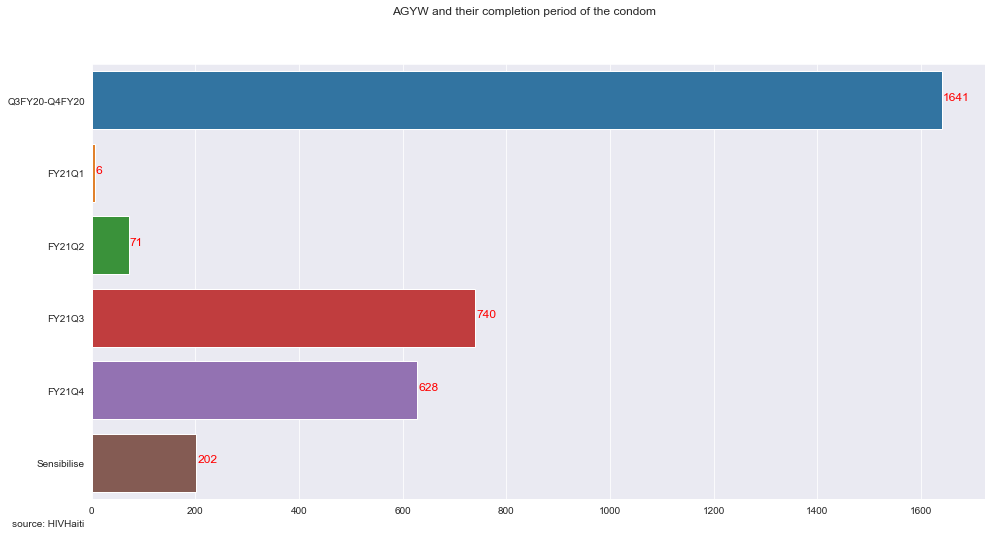

In [51]:
plt.figure(figsize=(16,8))
sns.set_style("darkgrid")
splot = sns.barplot(x="data",y="state",data=condoms_schema)
splot.set_xlabel("")
splot.set_ylabel("")
plt.suptitle("AGYW and their completion period of the condom")
for p in splot.patches:
    width = p.get_width()
    plt.text(2+p.get_width(), p.get_y()+0.50*p.get_height(),
             '{:1.0f}'.format(width), fontdict=dict(color="red",fontsize=12))
    
plt.annotate(
    "source: HIVHaiti",(0,0), (-80,-20), fontsize=10, 
             xycoords='axes fraction', textcoords='offset points', va='top'
)

plt.savefig("Condom_complete_trim",dpi=400)

<Figure size 1152x576 with 0 Axes>

Text(0.5, 0, '')

Text(0, 0.5, '')

Text(0.5, 0.98, 'AGYW, condoms awareness, enroled in a given Quarter')

Text(59.0, 0.0, '57')

Text(22.0, 1.0, '20')

Text(52.0, 2.0, '50')

Text(69.0, 3.0, '67')

Text(10.0, 4.0, '8')

Text(-80, -20, 'source: HIVHaiti')

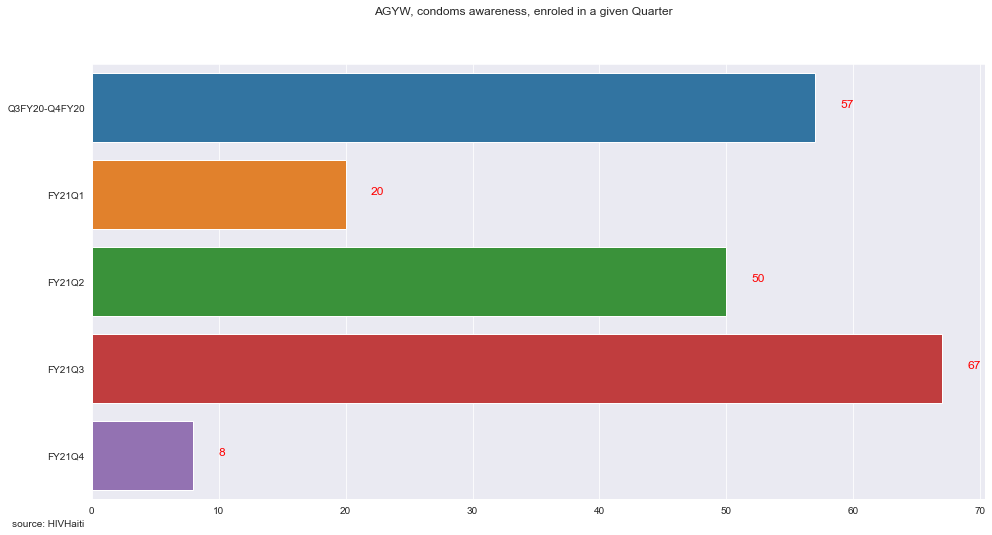

In [52]:
plt.figure(figsize=(16,8))
sns.set_style("darkgrid")
splot = sns.barplot(x="data",y="state",data=sens_condoms_schema)
splot.set_xlabel("")
splot.set_ylabel("")
plt.suptitle("AGYW, condoms awareness, enroled in a given Quarter")
for p in splot.patches:
    width = p.get_width()
    plt.text(2+p.get_width(), p.get_y()+0.50*p.get_height(),
             '{:1.0f}'.format(width), fontdict=dict(color="red",fontsize=12))
    
plt.annotate(
    "source: HIVHaiti",(0,0), (-80,-20), fontsize=10, 
             xycoords='axes fraction', textcoords='offset points', va='top'
)

plt.savefig("Awareness_condom_trim",dpi=400)